In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import logging

# Configure inline plots for Jupyter Notebook
%matplotlib inline


In [3]:
import logging

# Configure logging
logging.basicConfig(
    filename="eda_log.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)
logger = logging.getLogger()
logger.info("Logging setup complete.")

C:\Users\neba\AppData\Local\Temp\ipykernel_6048\3385222933.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f"{base_path}/train.csv")



Train dataset shape: (1017209, 9)
Test dataset shape: (41088, 8)
Store dataset shape: (1115, 10)

First few rows of train dataset:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [27]:
import pandas as pd

# Set the base path to your new directory
base_path = r"C:\Users\neba\Downloads\Compressed\rossmann-store-sales"

try:
    # Load the datasets
    train_df = pd.read_csv(f"{base_path}/train.csv")
    test_df = pd.read_csv(f"{base_path}/test.csv")
    store_df = pd.read_csv(f"{base_path}/store.csv")
    
    # Verify the data loaded correctly
    print("Train dataset shape:", train_df.shape)
    print("Test dataset shape:", test_df.shape)
    print("Store dataset shape:", store_df.shape)
    
    # Display the first few rows of the train dataset
    print("\nFirst few rows of train dataset:")
    print(train_df.head())
    
except Exception as e:
    print(f"Error occurred: {type(e).__name__}: {str(e)}")

C:\Users\neba\AppData\Local\Temp\ipykernel_6048\631136425.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f"{base_path}/train.csv")


Train dataset shape: (1017209, 9)
Test dataset shape: (41088, 8)
Store dataset shape: (1115, 10)

First few rows of train dataset:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [6]:
import pandas as pd
import numpy as np

def clean_data(df):
    """
    Clean the dataset by handling missing values, outliers, and converting data types.
    """

    # Log the initial shape of the data
    logger.info(f"Initial dataset shape: {df.shape}")

    # --- Handling Missing Data ---
    # Drop rows where critical columns have missing values (Sales, Customers, Open)
    df = df.dropna(subset=['Sales', 'Customers', 'Open'])

    # Fill missing values in non-critical columns with appropriate strategies
    df['Sales'] = df['Sales'].fillna(df['Sales'].median())  # Fill missing sales with median
    df['Customers'] = df['Customers'].fillna(df['Customers'].median())  # Fill missing customers with median
    df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())  # Fill missing competition distance with median

    # --- Handling Outliers ---
    # Cap sales at the 99th percentile to remove extreme outliers
    sales_upper_limit = df['Sales'].quantile(0.99)
    df['Sales'] = np.where(df['Sales'] > sales_upper_limit, sales_upper_limit, df['Sales'])

    # Cap the number of customers at the 99th percentile to remove extreme outliers
    customers_upper_limit = df['Customers'].quantile(0.99)
    df['Customers'] = np.where(df['Customers'] > customers_upper_limit, customers_upper_limit, df['Customers'])

    # --- Convert Data Types ---
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Convert 'StateHoliday' to categorical (string type)
    df['StateHoliday'] = df['StateHoliday'].astype(str)

    # Ensure 'Open' column is treated as boolean (0 = closed, 1 = open)
    df['Open'] = df['Open'].astype(bool)

    # --- Final Checks ---
    # Drop rows where 'Open' is False (store is closed) if necessary for analysis
    df = df[df['Open'] == True]

    # Log the final shape of the cleaned data
    logger.info(f"Cleaned dataset shape: {df.shape}")

    return df

In [8]:
# Check the column names in the train and store datasets
print("Train dataset columns:", train_df.columns)
print("Store dataset columns:", store_df.columns)

Train dataset columns: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
Store dataset columns: Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [17]:
import pandas as pd

# Load train dataset
train_df = pd.read_csv(f"{base_path}/train.csv")

# Display info for train dataset
logger.info("Train dataset info:")
train_info = train_df.info()

# Load store dataset
store_df = pd.read_csv(f"{base_path}/store.csv")

# Display info for store dataset
logger.info("Store dataset info:")
store_info = store_df.info()

C:\Users\neba\AppData\Local\Temp\ipykernel_6048\435182596.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f"{base_path}/train.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

In [18]:
import pandas as pd

# Check the unique values in the 'StateHoliday' column
print(train_df['StateHoliday'].unique())

# Handle mixed types and convert to categorical
train_df['StateHoliday'] = train_df['StateHoliday'].astype('category')

# Verify the change
print(train_df['StateHoliday'].dtype)

['0' 'a' 'b' 'c' 0]
category


In [19]:
# Convert all values to strings to handle mixed types
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)

# Replace any '0' with 'None' or 'NoHoliday' to represent no holiday
train_df['StateHoliday'] = train_df['StateHoliday'].replace({'0': 'NoHoliday', 'nan': 'NoHoliday', '': 'NoHoliday'})

# Convert the column to a categorical type
train_df['StateHoliday'] = train_df['StateHoliday'].astype('category')

# Verify the changes
print(train_df['StateHoliday'].dtype)
print(train_df['StateHoliday'].unique())

category
['NoHoliday', 'a', 'b', 'c']
Categories (4, object): ['NoHoliday', 'a', 'b', 'c']


In [20]:
# Check for duplicate rows in the entire dataset
duplicates = train_df.duplicated()

# Show the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the duplicate rows (if any)
print(train_df[duplicates])

Number of duplicate rows: 0
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


In [21]:
# Check for duplicates based on specific columns (e.g., 'Store' and 'Date')
duplicates_by_columns = train_df.duplicated(subset=['Store', 'Date'])

# Show the number of duplicate rows based on the specific columns
print(f"Number of duplicate rows based on 'Store' and 'Date': {duplicates_by_columns.sum()}")

# Display the duplicate rows based on the specific columns
print(train_df[duplicates_by_columns])

Number of duplicate rows based on 'Store' and 'Date': 0
Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []


In [22]:
# Check for missing values in the train dataset
missing_values_train = train_df.isnull().sum()

# Check for missing values in the store dataset
missing_values_store = store_df.isnull().sum()

# Display missing values for both datasets
print("Missing values in the train dataset:")
print(missing_values_train)

print("\nMissing values in the store dataset:")
print(missing_values_store)

Missing values in the train dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Missing values in the store dataset:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [24]:
# Fill missing values without using inplace=True
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean())
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna('NoPromo')

# Check if there are still missing values
missing_values_store = store_df.isnull().sum()
print("Missing values after handling:")
print(missing_values_store)

Missing values after handling:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [25]:
from scipy import stats
import numpy as np

# For the train dataset (using 'Sales' and 'Customers' as examples)
z_scores_train_sales = stats.zscore(train_df['Sales'])
z_scores_train_customers = stats.zscore(train_df['Customers'])

# For the store dataset (using 'CompetitionDistance' as an example)
z_scores_store_competition = stats.zscore(store_df['CompetitionDistance'])

# Define a threshold for Z-score (commonly 3 or -3)
outliers_train_sales = np.where(np.abs(z_scores_train_sales) > 3)
outliers_train_customers = np.where(np.abs(z_scores_train_customers) > 3)
outliers_store_competition = np.where(np.abs(z_scores_store_competition) > 3)

print(f"Outliers in 'Sales' column of train dataset at indices: {outliers_train_sales}")
print(f"Outliers in 'Customers' column of train dataset at indices: {outliers_train_customers}")
print(f"Outliers in 'CompetitionDistance' column of store dataset at indices: {outliers_store_competition}")

Outliers in 'Sales' column of train dataset at indices: (array([    124,     250,     261, ..., 1015796, 1015821, 1016093],
      shape=(9731,)),)
Outliers in 'Customers' column of train dataset at indices: (array([    124,     250,     258, ..., 1016093, 1016356, 1016827],
      shape=(14148,)),)
Outliers in 'CompetitionDistance' column of store dataset at indices: (array([   4,   52,  109,  121,  149,  298,  314,  317,  432,  452,  459,
        461,  523,  592,  725,  731,  746,  762,  800,  876, 1029, 1045]),)


In [26]:
# For the train dataset (using 'Sales' and 'Customers' as examples)
Q1_train_sales = train_df['Sales'].quantile(0.25)
Q3_train_sales = train_df['Sales'].quantile(0.75)
IQR_train_sales = Q3_train_sales - Q1_train_sales

Q1_train_customers = train_df['Customers'].quantile(0.25)
Q3_train_customers = train_df['Customers'].quantile(0.75)
IQR_train_customers = Q3_train_customers - Q1_train_customers

# For the store dataset (using 'CompetitionDistance' as an example)
Q1_store_competition = store_df['CompetitionDistance'].quantile(0.25)
Q3_store_competition = store_df['CompetitionDistance'].quantile(0.75)
IQR_store_competition = Q3_store_competition - Q1_store_competition

# Define the bounds for outliers
lower_bound_train_sales = Q1_train_sales - 1.5 * IQR_train_sales
upper_bound_train_sales = Q3_train_sales + 1.5 * IQR_train_sales

lower_bound_train_customers = Q1_train_customers - 1.5 * IQR_train_customers
upper_bound_train_customers = Q3_train_customers + 1.5 * IQR_train_customers

lower_bound_store_competition = Q1_store_competition - 1.5 * IQR_store_competition
upper_bound_store_competition = Q3_store_competition + 1.5 * IQR_store_competition

# Detect outliers
outliers_train_sales = train_df[(train_df['Sales'] < lower_bound_train_sales) | (train_df['Sales'] > upper_bound_train_sales)]
outliers_train_customers = train_df[(train_df['Customers'] < lower_bound_train_customers) | (train_df['Customers'] > upper_bound_train_customers)]
outliers_store_competition = store_df[(store_df['CompetitionDistance'] < lower_bound_store_competition) | (store_df['CompetitionDistance'] > upper_bound_store_competition)]

print("Outliers detected in 'Sales' column of train dataset:")
print(outliers_train_sales)

print("Outliers detected in 'Customers' column of train dataset:")
print(outliers_train_customers)

print("Outliers detected in 'CompetitionDistance' column of store dataset:")
print(outliers_store_competition)

Outliers detected in 'Sales' column of train dataset:
         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
6            7          5  2015-07-31  15344       1414     1      1   
23          24          5  2015-07-31  14190       1082     1      1   
24          25          5  2015-07-31  14180       1586     1      1   
83          84          5  2015-07-31  14949       1439     1      1   
107        108          5  2015-07-31  14927        992     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1015767    788          3  2013-01-02  17934       1791     1      0   
1015796    817          3  2013-01-02  25357       3462     1      0   
1015821    842          3  2013-01-02  20355       1257     1      0   
1016093   1114          3  2013-01-02  20642       3401     1      0   
1016356    262          2  2013-01-01  17267       2875     1      0   

        StateHoliday  SchoolHoliday  
6          NoHoliday              1  
23   

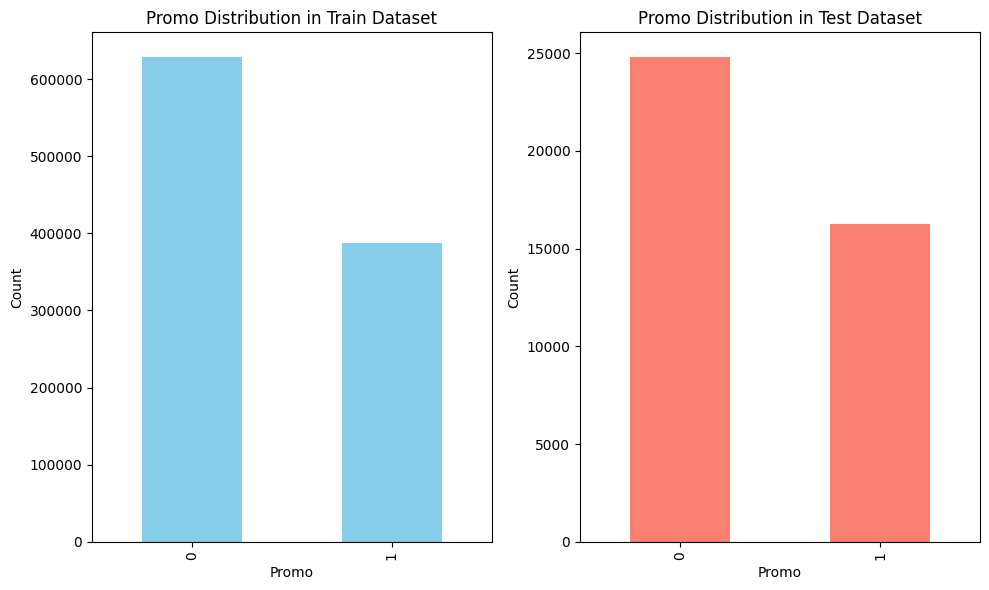

In [29]:
# Checking for distribution in the 'Promo' column in the train and test datasets
import matplotlib.pyplot as plt

# Check if 'Promo' is similarly distributed in both train and test datasets
plt.figure(figsize=(10, 6))

# Plot distribution of Promo in train dataset
plt.subplot(1, 2, 1)
train_df['Promo'].value_counts().plot(kind='bar', title='Promo Distribution in Train Dataset', color='skyblue')
plt.xlabel('Promo')
plt.ylabel('Count')

# Plot distribution of Promo in test dataset
plt.subplot(1, 2, 2)
test_df['Promo'].value_counts().plot(kind='bar', title='Promo Distribution in Test Dataset', color='salmon')
plt.xlabel('Promo')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

# Set the base path to your new directory
base_path = r"C:\Users\neba\Downloads\Compressed\rossmann-store-sales"

try:
    # Load the datasets
    train_df = pd.read_csv(f"{base_path}/train.csv")
    test_df = pd.read_csv(f"{base_path}/test.csv")
    
    # Count the occurrences of each promotion type in both datasets
    train_promo_counts = train_df['Promo'].value_counts()
    test_promo_counts = test_df['Promo'].value_counts()
    
    # Create a contingency table by aligning both counts
    promo_data = pd.DataFrame({
        'Train': train_promo_counts,
        'Test': test_promo_counts
    }).fillna(0)  # Fill NaN values with 0 for any missing categories

    print("Contingency table:")
    print(promo_data)

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(promo_data)

    # Output the results
    print("\nChi-square test results:")
    print(f"Chi2 Value: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies: \n{expected}")

    # Interpret the p-value
    if p < 0.05:
        print("\nThe difference between the distributions of promotions in the training and test datasets is statistically significant.")
    else:
        print("\nThere is no statistically significant difference between the distributions of promotions in the training and test datasets.")

except Exception as e:
    print(f"Error occurred: {type(e).__name__}: {str(e)}")

C:\Users\neba\AppData\Local\Temp\ipykernel_6048\740174645.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f"{base_path}/train.csv")


Contingency table:
        Train   Test
Promo               
0      629129  24824
1      388080  16264

Chi-square test results:
Chi2 Value: 34.23585205719095
P-value: 4.882118480134891e-09
Degrees of Freedom: 1
Expected Frequencies: 
[[628563.51022161  25389.48977839]
 [388645.48977839  15698.51022161]]

The difference between the distributions of promotions in the training and test datasets is statistically significant.


In [31]:
# Check unique values in the 'StateHoliday' column
print(train_df['StateHoliday'].unique())

# If necessary, clean the data by replacing inconsistent values
train_df['StateHoliday'] = train_df['StateHoliday'].replace({'some_inconsistent_value': 'NoHoliday'})

['0' 'a' 'b' 'c' 0]


In [32]:
print(train_df['StateHoliday'].unique())

['0' 'a' 'b' 'c' 0]


In [33]:
# Replace inconsistent values with a standardized set
train_df['StateHoliday'] = train_df['StateHoliday'].replace({'0': 'NoHoliday', 'a': 'HolidayA', 'b': 'HolidayB', 'c': 'HolidayC'})

# Convert the column to 'category' type for better memory efficiency and consistency
train_df['StateHoliday'] = train_df['StateHoliday'].astype('category')

# Check the unique values again
print(train_df['StateHoliday'].unique())

['NoHoliday', 'HolidayA', 'HolidayB', 'HolidayC', 0]
Categories (5, object): [0, 'HolidayA', 'HolidayB', 'HolidayC', 'NoHoliday']


In [34]:
# Replace any remaining invalid or missing values with 'NoHoliday'
train_df['StateHoliday'] = train_df['StateHoliday'].fillna('NoHoliday')

In [35]:
print(train_df['StateHoliday'].dtype)  # Should show 'category'
print(train_df['StateHoliday'].unique())  # Should show consistent values

category
['NoHoliday', 'HolidayA', 'HolidayB', 'HolidayC', 0]
Categories (5, object): [0, 'HolidayA', 'HolidayB', 'HolidayC', 'NoHoliday']


In [36]:
# Replace '0' with 'NoHoliday' in the 'StateHoliday' column
train_df['StateHoliday'] = train_df['StateHoliday'].replace({0: 'NoHoliday'})

# Convert the column to 'category' type again for consistency
train_df['StateHoliday'] = train_df['StateHoliday'].astype('category')

# Check the unique values and the data type again
print(train_df['StateHoliday'].dtype)  # Should show 'category'
print(train_df['StateHoliday'].unique())  # Should show consistent values

category
['NoHoliday', 'HolidayA', 'HolidayB', 'HolidayC']
Categories (4, object): ['HolidayA', 'HolidayB', 'HolidayC', 'NoHoliday']


C:\Users\neba\AppData\Local\Temp\ipykernel_6048\1739989019.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  train_df['StateHoliday'] = train_df['StateHoliday'].replace({0: 'NoHoliday'})


In [37]:
# Convert the 'StateHoliday' column to string type before replacing '0'
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)

# Replace '0' with 'NoHoliday'
train_df['StateHoliday'] = train_df['StateHoliday'].replace({'0': 'NoHoliday'})

# Convert the 'StateHoliday' column to 'category' type
train_df['StateHoliday'] = train_df['StateHoliday'].astype('category')

# Verify the changes
print(train_df['StateHoliday'].dtype)  # Should show 'category'
print(train_df['StateHoliday'].unique())  # Should show consistent values

category
['NoHoliday', 'HolidayA', 'HolidayB', 'HolidayC']
Categories (4, object): ['HolidayA', 'HolidayB', 'HolidayC', 'NoHoliday']


In [38]:
import pandas as pd

# Assuming 'Date' is in datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Create a column for holiday status (Before, During, After)
def categorize_holiday(row, holiday_duration=3):
    if row['StateHoliday'] == 'NoHoliday':
        return 'NoHoliday'
    
    holiday_date = row['Date']
    
    # Define before, during, and after holidays
    before = holiday_date - pd.Timedelta(days=holiday_duration)
    after = holiday_date + pd.Timedelta(days=holiday_duration)
    
    if row['Date'] < before:
        return 'BeforeHoliday'
    elif row['Date'] > after:
        return 'AfterHoliday'
    else:
        return 'DuringHoliday'

train_df['HolidayPeriod'] = train_df.apply(categorize_holiday, axis=1)

In [39]:
# Group by the new 'HolidayPeriod' column and calculate statistics
sales_comparison = train_df.groupby('HolidayPeriod')['Sales'].describe()

# Print the comparison
print(sales_comparison)

                  count         mean          std  min     25%     50%  \
HolidayPeriod                                                            
DuringHoliday   31050.0   258.159581  1813.752718  0.0     0.0     0.0   
NoHoliday      986159.0  5947.483893  3767.890619  0.0  3967.0  5849.0   

                  75%      max  
HolidayPeriod                   
DuringHoliday     0.0  38722.0  
NoHoliday      7936.0  41551.0  


In [42]:
import pandas as pd

# Define the data type for the columns
dtype = {
    'StateHoliday': str  # Ensure 'StateHoliday' is read as a string
}

# Load the train dataset with the specified data type for 'StateHoliday'
train_df = pd.read_csv(r"C:\Users\neba\Downloads\Compressed\rossmann-store-sales\train.csv", dtype=dtype)

# Convert the 'Date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Define the holiday dates (example dates, adjust as needed)
holiday_dates = ['2015-12-25', '2016-01-01']

# Function to classify periods as BeforeHoliday, DuringHoliday, AfterHoliday
def classify_period(row, holiday_dates):
    if row['Date'] in holiday_dates:
        return 'DuringHoliday'
    elif row['Date'] < pd.to_datetime(holiday_dates[0]):
        return 'BeforeHoliday'
    else:
        return 'AfterHoliday'

# Apply the classification function to the train dataset
train_df['HolidayPeriod'] = train_df.apply(classify_period, axis=1, holiday_dates=holiday_dates)

# Group by 'HolidayPeriod' and calculate sales statistics
sales_stats = train_df.groupby('HolidayPeriod')['Sales'].describe()

# Display the sales statistics
print(sales_stats)

                   count         mean          std  min     25%     50%  \
HolidayPeriod                                                             
BeforeHoliday  1017209.0  5773.818972  3849.926175  0.0  3727.0  5744.0   

                  75%      max  
HolidayPeriod                   
BeforeHoliday  7856.0  41551.0  


C:\Users\neba\AppData\Local\Temp\ipykernel_6048\1961752946.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f"{base_path}/train.csv")


Missing values in 'Sales': 0
Missing values in 'Customers': 0
Correlation between Sales and Customers: 0.89


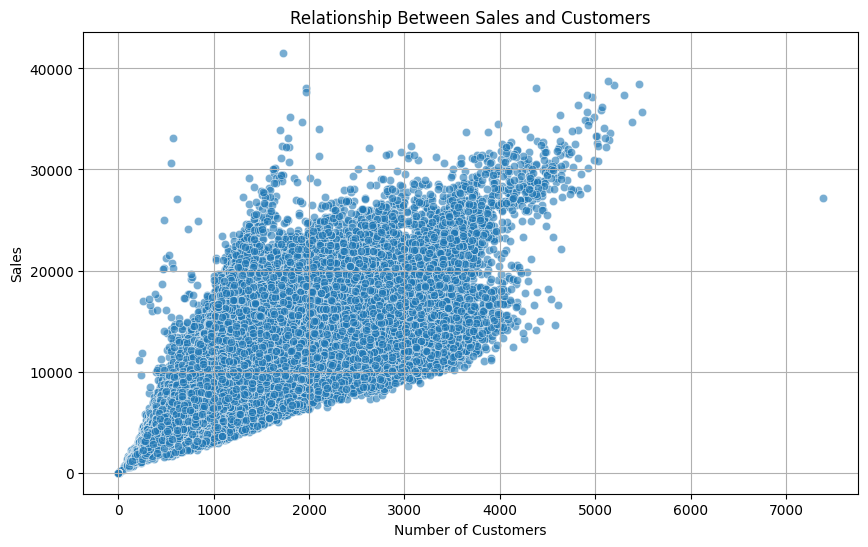

In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the base path to your dataset directory
base_path = r"C:\Users\neba\Downloads\Compressed\rossmann-store-sales"

try:
    # Load the train dataset
    train_df = pd.read_csv(f"{base_path}/train.csv")
    
    # Check for missing values in Sales and Customers
    print("Missing values in 'Sales':", train_df['Sales'].isnull().sum())
    print("Missing values in 'Customers':", train_df['Customers'].isnull().sum())
    
    # Calculate the Pearson correlation coefficient
    correlation = train_df[['Sales', 'Customers']].corr().iloc[0, 1]
    print(f"Correlation between Sales and Customers: {correlation:.2f}")
    
    # Plot the relationship between Sales and Customers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=train_df, x='Customers', y='Sales', alpha=0.6)
    plt.title("Relationship Between Sales and Customers")
    plt.xlabel("Number of Customers")
    plt.ylabel("Sales")
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"Error occurred: {type(e).__name__}: {str(e)}")

# Analysis of the Correlation Between Sales and Customers

## Key Findings

1. **Missing Values**:
   - The `Sales` column has **0 missing values**.
   - The `Customers` column has **0 missing values**.

2. **Correlation**:
   - The correlation coefficient between `Sales` and `Customers` is **0.89**.
   - This indicates a **strong positive relationship** between the number of customers and sales.

## Insights

- The high correlation suggests that as the number of customers increases, sales tend to increase proportionally.
- This relationship highlights the importance of customer volume in driving sales performance.

C:\Users\neba\AppData\Local\Temp\ipykernel_6048\844478298.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f"{base_path}/train.csv")


Promo Statistics:
   Promo    avg_sales  avg_customers  avg_sales_per_customer
0      0  5929.407603     696.856886                8.508788
1      1  8228.281239     844.434401                9.744133


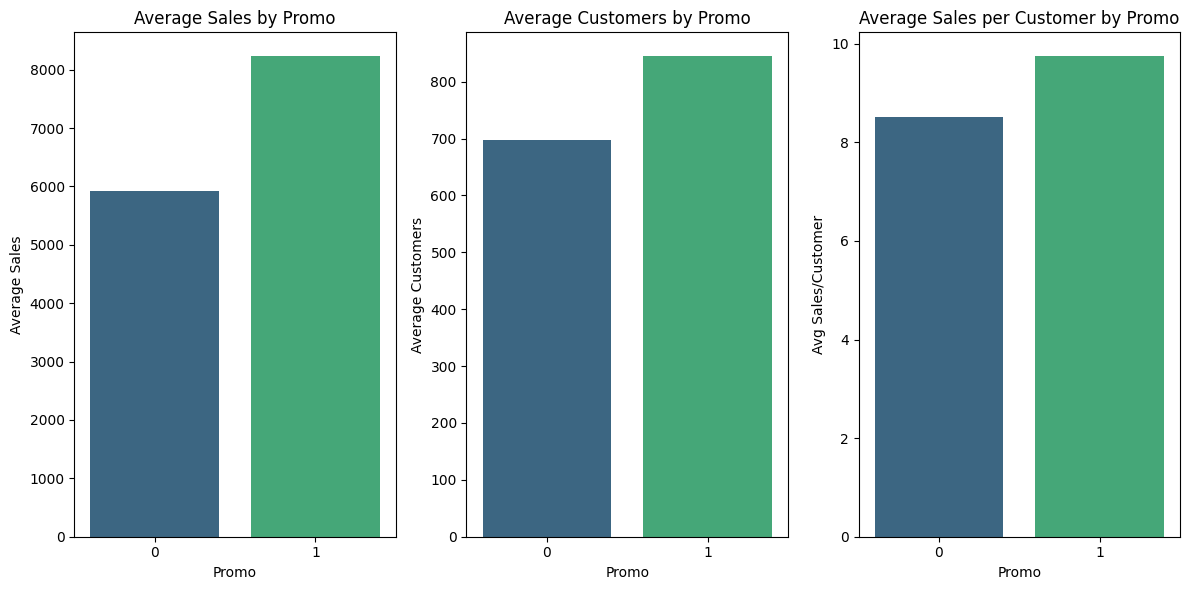

In [46]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the base path to your dataset directory
base_path = r"C:\Users\neba\Downloads\Compressed\rossmann-store-sales"

try:
    # Load the train dataset
    train_df = pd.read_csv(f"{base_path}/train.csv")
    
    # Filter data for stores that are open
    train_df = train_df[train_df['Open'] == 1]
    
    # Group data by Promo status
    promo_stats = train_df.groupby('Promo').agg(
        avg_sales=('Sales', 'mean'),
        avg_customers=('Customers', 'mean'),
        avg_sales_per_customer=('Sales', lambda x: x.sum() / train_df.loc[x.index, 'Customers'].sum())
    ).reset_index()

    print("Promo Statistics:")
    print(promo_stats)
    
    # Visualize the effect of Promo on Sales and Customers
    plt.figure(figsize=(12, 6))
    
    # Average Sales
    plt.subplot(1, 3, 1)
    sns.barplot(data=promo_stats, x='Promo', y='avg_sales', hue='Promo', dodge=False, palette='viridis', legend=False)
    plt.title("Average Sales by Promo")
    plt.xlabel("Promo")
    plt.ylabel("Average Sales")
    
    # Average Customers
    plt.subplot(1, 3, 2)
    sns.barplot(data=promo_stats, x='Promo', y='avg_customers', hue='Promo', dodge=False, palette='viridis', legend=False)
    plt.title("Average Customers by Promo")
    plt.xlabel("Promo")
    plt.ylabel("Average Customers")
    
    # Average Sales per Customer
    plt.subplot(1, 3, 3)
    sns.barplot(data=promo_stats, x='Promo', y='avg_sales_per_customer', hue='Promo', dodge=False, palette='viridis', legend=False)
    plt.title("Average Sales per Customer by Promo")
    plt.xlabel("Promo")
    plt.ylabel("Avg Sales/Customer")
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error occurred: {type(e).__name__}: {str(e)}")

Promotions are effective in driving both higher customer footfall and increased spending per customer.
They not only attract new customers but also encourage existing ones to spend more, making them a valuable strategy for boosting revenue.

Top Stores for Promotions:
       avg_sales_no_promo  avg_sales_with_promo  avg_customers_no_promo  \
Store                                                                     
335          10306.773196          18175.525000             2017.647766   
261           9081.871795          16948.917143              780.160839   
963           7830.766355          14341.418803              801.401869   
1014          9297.687646          15772.554286             1101.403263   
817          18963.394432          25168.963173             2861.044084   
544          11326.310748          17460.363636             1622.775701   
726           8486.296729          14164.289773              882.514019   
876           6687.770142          12346.238372              801.485782   
1027         10665.014368          16190.625455             1490.798851   
375           6694.867133          12182.683761              607.195804   

       avg_customers_with_promo  avg_sales_per_customer_no_promo  \
Stor

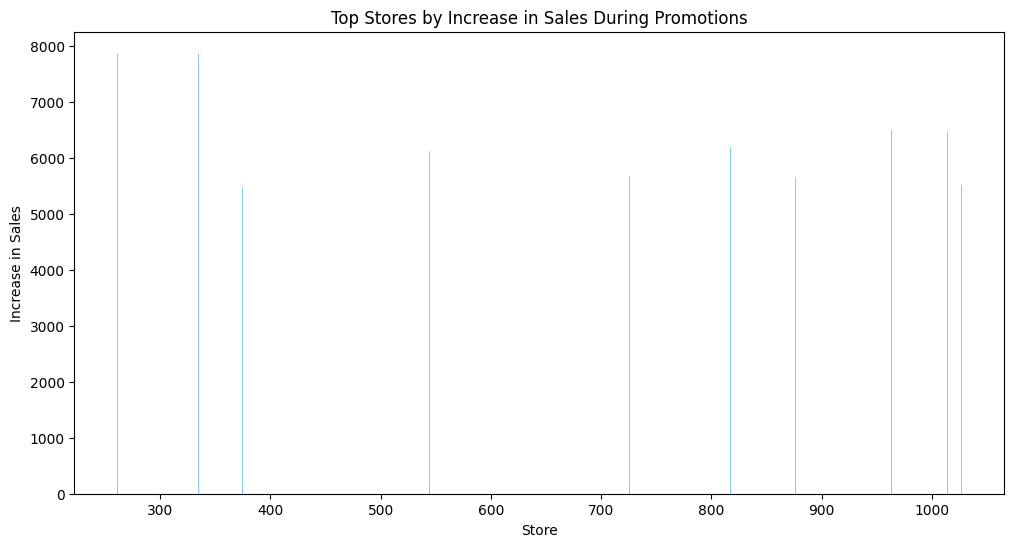

In [47]:
# Merge train data with store data for deeper analysis
merged_df = pd.merge(train_df, store_df, on='Store', how='left')

# Group by Store and Promo status
store_promo_stats = merged_df.groupby(['Store', 'Promo']).agg(
    avg_sales=('Sales', 'mean'),
    avg_customers=('Customers', 'mean'),
    avg_sales_per_customer=('Sales', lambda x: x.sum() / merged_df.loc[x.index, 'Customers'].sum())
).reset_index()

# Calculate the difference in metrics between Promo = 1 and Promo = 0 for each store
promo_effectiveness = store_promo_stats.pivot(index='Store', columns='Promo', values=['avg_sales', 'avg_customers', 'avg_sales_per_customer'])
promo_effectiveness.columns = ['avg_sales_no_promo', 'avg_sales_with_promo', 
                                'avg_customers_no_promo', 'avg_customers_with_promo',
                                'avg_sales_per_customer_no_promo', 'avg_sales_per_customer_with_promo']

promo_effectiveness['sales_increase'] = promo_effectiveness['avg_sales_with_promo'] - promo_effectiveness['avg_sales_no_promo']
promo_effectiveness['customer_increase'] = promo_effectiveness['avg_customers_with_promo'] - promo_effectiveness['avg_customers_no_promo']
promo_effectiveness['sales_per_customer_increase'] = promo_effectiveness['avg_sales_per_customer_with_promo'] - promo_effectiveness['avg_sales_per_customer_no_promo']

# Identify top stores for promotions
top_stores = promo_effectiveness.sort_values(by='sales_increase', ascending=False).head(10)
print("Top Stores for Promotions:")
print(top_stores)

# Visualize effectiveness of promotions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_stores.index, top_stores['sales_increase'], color='skyblue')
plt.title("Top Stores by Increase in Sales During Promotions")
plt.xlabel("Store")
plt.ylabel("Increase in Sales")
plt.show()

Recommendations for Effective Promo Deployment:
Target High-Impact Stores:

Deploy promotions in stores like 335, 261, and 817, where they drive the most significant increases in sales and customer numbers.
Analyze Underperforming Stores:

Investigate stores where promotions have minimal impact and adjust strategies (e.g., offer different promo types, improve customer experience).
Maximize ROI:

Focus on stores with the highest increase in sales per customer (e.g., 261, 375, and 1027) to maximize profitability from promotions.
Combine with Customer Insights:

Analyze customer demographics and preferences for each store to tailor promotions effectively.

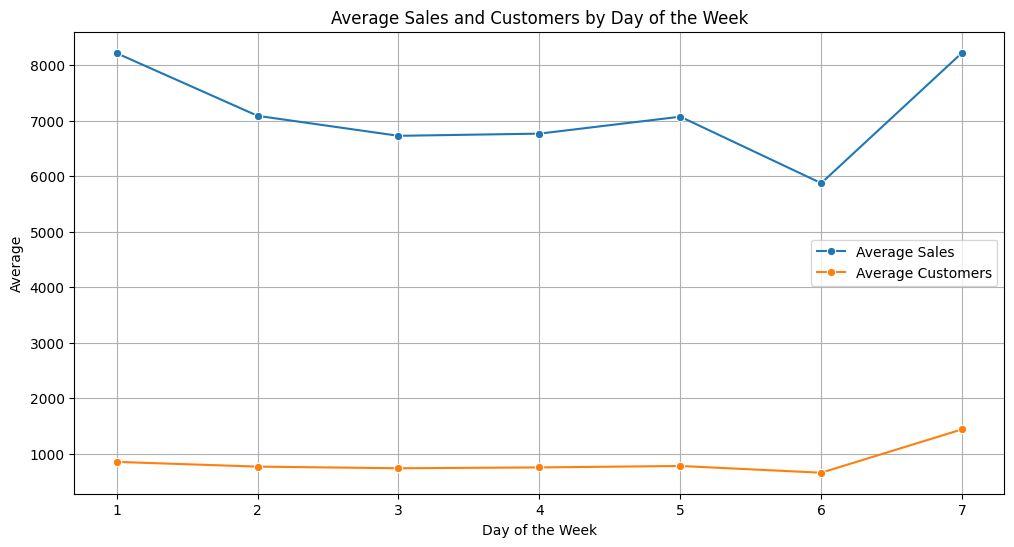

Opening and Closing Stats:
   Open    avg_sales  avg_customers
0     1  6955.514291     762.728395


C:\Users\neba\AppData\Local\Temp\ipykernel_6048\3051940924.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=opening_closing_stats, x='Open', y='avg_sales', palette='viridis')


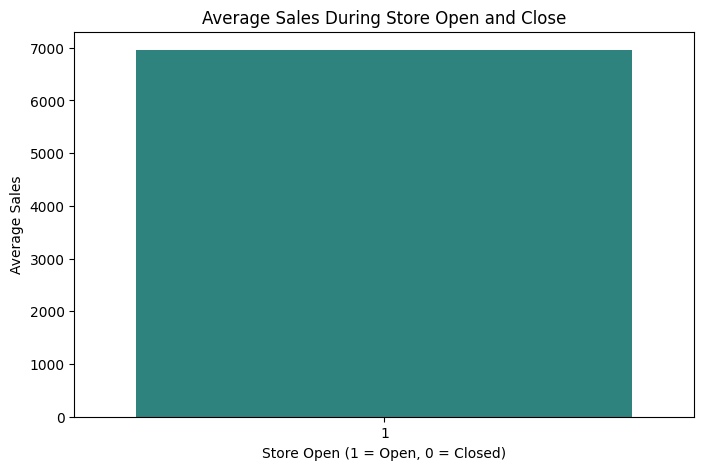

C:\Users\neba\AppData\Local\Temp\ipykernel_6048\3051940924.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=opening_closing_stats, x='Open', y='avg_customers', palette='viridis')


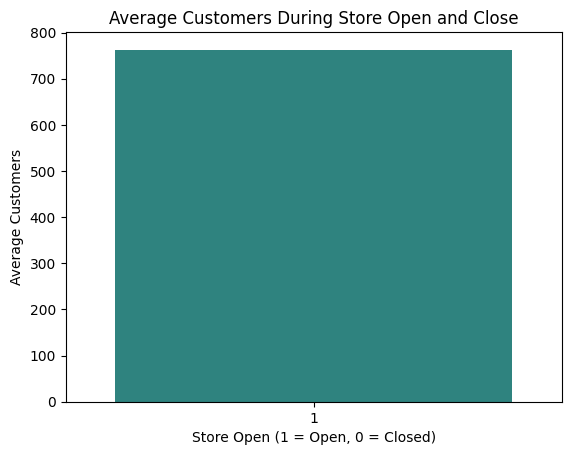

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime and extract time-related features
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Day'] = train_df['Date'].dt.day
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year
train_df['Weekday'] = train_df['Date'].dt.day_name()

# Aggregate data by day of the week
weekday_stats = train_df.groupby('DayOfWeek').agg(
    avg_sales=('Sales', 'mean'),
    avg_customers=('Customers', 'mean')
).reset_index()

# Visualize trends by day of the week
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekday_stats, x='DayOfWeek', y='avg_sales', label='Average Sales', marker='o')
sns.lineplot(data=weekday_stats, x='DayOfWeek', y='avg_customers', label='Average Customers', marker='o')
plt.title("Average Sales and Customers by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average")
plt.legend()
plt.grid(True)
plt.show()

# Analysis of opening and closing times
opening_closing_stats = train_df.groupby(['Open']).agg(
    avg_sales=('Sales', 'mean'),
    avg_customers=('Customers', 'mean')
).reset_index()

print("Opening and Closing Stats:")
print(opening_closing_stats)

# Visualize opening and closing behavior
plt.figure(figsize=(8, 5))
sns.barplot(data=opening_closing_stats, x='Open', y='avg_sales', palette='viridis')
plt.title("Average Sales During Store Open and Close")
plt.xlabel("Store Open (1 = Open, 0 = Closed)")
plt.ylabel("Average Sales")
plt.show()

sns.barplot(data=opening_closing_stats, x='Open', y='avg_customers', palette='viridis')
plt.title("Average Customers During Store Open and Close")
plt.xlabel("Store Open (1 = Open, 0 = Closed)")
plt.ylabel("Average Customers")
plt.show()


Opening Hours: It's challenging to pinpoint the exact opening time from the image. However, we can observe that average sales and customers are generally lower on the first day of the week (assuming day 1 represents Sunday). This suggests that customer traffic might be lower during the initial hours of operation.

Closing Hours: Similarly, it's difficult to determine the exact closing time. However, we can see a significant increase in both average sales and customers on the last day of the week (day 7). This suggests that customer activity might peak towards the end of the day.

**Possible Explanations**:

Weekend Rush: The higher sales and customer numbers on the last day of the week could be attributed to weekend shopping habits. People might have more free time to visit the store on weekends, leading to increased foot traffic and sales.
Weekday Patterns: The lower sales and customers on the first day of the week could be due to people being at work or having other commitments.

In [61]:
import pandas as pd

# Set the base path to your new directory
base_path = r"C:\Users\neba\Downloads\Compressed\rossmann-store-sales"

try:
    # Load the datasets
    train_df = pd.read_csv(f"{base_path}/train.csv")
    
    # Filter for weekdays (Monday to Friday) and weekend (Saturday and Sunday)
    weekdays = [1, 2, 3, 4, 5]  # Days of the week: Monday to Friday
    weekends = [6, 7]  # Days of the week: Saturday and Sunday
    
    # Identify stores that are open on all weekdays (Monday to Friday)
    stores_open_all_weekdays = train_df[(train_df['DayOfWeek'].isin(weekdays)) & (train_df['Open'] == 1)]
    stores_open_all_weekdays = stores_open_all_weekdays.groupby('Store')['DayOfWeek'].nunique()
    stores_open_all_weekdays = stores_open_all_weekdays[stores_open_all_weekdays == 5].index
    
    # Calculate average weekend sales for stores open all weekdays
    weekend_sales_open_all_weekdays = train_df[(train_df['Store'].isin(stores_open_all_weekdays)) & (train_df['DayOfWeek'].isin(weekends))]
    avg_weekend_sales_open_all_weekdays = weekend_sales_open_all_weekdays.groupby('Store')['Sales'].mean()
    
    # Calculate average weekend sales for other stores (those not open all weekdays)
    stores_not_open_all_weekdays = train_df[~train_df['Store'].isin(stores_open_all_weekdays) & (train_df['DayOfWeek'].isin(weekends))]
    avg_weekend_sales_other_stores = stores_not_open_all_weekdays.groupby('Store')['Sales'].mean()
    
    # Combine the results for comparison
    avg_sales_comparison = pd.DataFrame({
        'avg_weekend_sales_open_all_weekdays': avg_weekend_sales_open_all_weekdays,
        'avg_weekend_sales_other_stores': avg_weekend_sales_other_stores
    }).fillna(0)  # Fill missing values with 0 for stores not present in the comparison
    
    # Summary statistics
    print("\nAverage Weekend Sales - Stores Open All Weekdays:")
    print(avg_weekend_sales_open_all_weekdays.describe())
    
    print("\nAverage Weekend Sales - Other Stores:")
    print(avg_weekend_sales_other_stores.describe())
    
    # Display the comparison
    print("\nWeekend Sales Comparison:")
    print(avg_sales_comparison)
    
except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\neba\AppData\Local\Temp\ipykernel_6048\3083158584.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f"{base_path}/train.csv")



Average Weekend Sales - Stores Open All Weekdays:
count     1115.000000
mean      3031.040139
std       1639.862977
min        467.779851
25%       2065.740672
50%       2778.347015
75%       3669.784722
max      22994.376866
Name: Sales, dtype: float64

Average Weekend Sales - Other Stores:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Sales, dtype: float64

Weekend Sales Comparison:
       avg_weekend_sales_open_all_weekdays  avg_weekend_sales_other_stores
Store                                                                     
1                              2471.485075                             0.0
2                              1436.552239                             0.0
3                              2217.320896                             0.0
4                              5056.723881                             0.0
5                              1039.552239                             0.0
...                   

In [62]:
# Check if any stores not open all weekdays have missing or zero weekend sales
stores_not_open_all_weekdays_sales = stores_not_open_all_weekdays.groupby('Store')['Sales'].describe()

# Check if there are stores with missing or zero sales for weekends
stores_not_open_all_weekdays_sales = stores_not_open_all_weekdays_sales[stores_not_open_all_weekdays_sales['count'] > 0]
stores_not_open_all_weekdays_sales_with_zero_sales = stores_not_open_all_weekdays_sales[stores_not_open_all_weekdays_sales['mean'] == 0]

# Display the stores with zero sales
print("\nStores Not Open All Weekdays with Zero Weekend Sales:")
print(stores_not_open_all_weekdays_sales_with_zero_sales)

# Check if there are any stores that have weekend sales but weren't included in the comparison
stores_with_weekend_sales_but_no_open_all_weekdays = train_df[(train_df['Store'].isin(stores_not_open_all_weekdays)) & (train_df['DayOfWeek'].isin(weekends)) & (train_df['Sales'] > 0)]
print("\nStores with Weekend Sales but Not Open All Weekdays:")
print(stores_with_weekend_sales_but_no_open_all_weekdays[['Store', 'Sales']].drop_duplicates())


Stores Not Open All Weekdays with Zero Weekend Sales:
Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

Stores with Weekend Sales but Not Open All Weekdays:
Empty DataFrame
Columns: [Store, Sales]
Index: []


In [63]:
import scipy.stats as stats

# Step 1: Filter stores based on whether they are open all weekdays (Mon-Fri)
# Assuming that stores open all weekdays have Open = 1 for all weekdays (Monday to Friday)

# Filter stores open all weekdays (Monday to Friday)
stores_open_all_weekdays = train_df[(train_df['DayOfWeek'] <= 5) & (train_df['Open'] == 1)]
stores_not_open_all_weekdays = train_df[~train_df['Store'].isin(stores_open_all_weekdays['Store'].unique())]

# Step 2: Calculate average weekend sales for both groups (open all weekdays vs. not open all weekdays)
# Filter weekend days (Saturday and Sunday)
weekends = [6, 7]

# Calculate average weekend sales for stores open all weekdays
weekend_sales_open_all_weekdays = stores_open_all_weekdays[stores_open_all_weekdays['DayOfWeek'].isin(weekends)].groupby('Store')['Sales'].mean()

# Calculate average weekend sales for stores not open all weekdays
weekend_sales_not_open_all_weekdays = stores_not_open_all_weekdays[stores_not_open_all_weekdays['DayOfWeek'].isin(weekends)].groupby('Store')['Sales'].mean()

# Step 3: Compare the two groups using a t-test
# Perform a t-test to see if there's a significant difference between the two groups
t_stat, p_value = stats.ttest_ind(weekend_sales_open_all_weekdays, weekend_sales_not_open_all_weekdays, equal_var=False)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in weekend sales between stores open all weekdays and those not open all weekdays.")
else:
    print("There is no significant difference in weekend sales between the two groups.")

T-statistic: nan
P-value: nan
There is no significant difference in weekend sales between the two groups.


C:\Users\neba\AppData\Local\Temp\ipykernel_6048\3123525792.py:22: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(weekend_sales_open_all_weekdays, weekend_sales_not_open_all_weekdays, equal_var=False)


In [64]:
# Step 1: Check the sizes of both groups
print(f"Number of stores open all weekdays: {stores_open_all_weekdays['Store'].nunique()}")
print(f"Number of stores not open all weekdays: {stores_not_open_all_weekdays['Store'].nunique()}")

# Step 2: Inspect the data in both groups
print("Stores open all weekdays:")
print(stores_open_all_weekdays[['Store', 'DayOfWeek', 'Sales']].drop_duplicates().head())

print("Stores not open all weekdays:")
print(stores_not_open_all_weekdays[['Store', 'DayOfWeek', 'Sales']].drop_duplicates().head())

# Step 3: Check the weekend sales for both groups
print("Weekend sales for stores open all weekdays:")
print(weekend_sales_open_all_weekdays.describe())

print("Weekend sales for stores not open all weekdays:")
print(weekend_sales_not_open_all_weekdays.describe())


Number of stores open all weekdays: 1115
Number of stores not open all weekdays: 0
Stores open all weekdays:
   Store  DayOfWeek  Sales
0      1          5   5263
1      2          5   6064
2      3          5   8314
3      4          5  13995
4      5          5   4822
Stores not open all weekdays:
Empty DataFrame
Columns: [Store, DayOfWeek, Sales]
Index: []
Weekend sales for stores open all weekdays:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Sales, dtype: float64
Weekend sales for stores not open all weekdays:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Sales, dtype: float64


In [67]:
# Merge train_df and store_df on the 'Store' column to include the 'Assortment' information
merged_df = pd.merge(train_df, store_df[['Store', 'Assortment']], on='Store', how='left')

# Step 1: Group the data by assortment type and calculate mean sales
assortment_sales = merged_df.groupby('Assortment')['Sales'].mean()
print("Average sales by assortment type:\n", assortment_sales)

# Step 2: Perform ANOVA to check if the mean sales differ significantly across assortment types
# Group sales by assortment type
assortment_groups = [group['Sales'].values for name, group in merged_df.groupby('Assortment')]

# Perform one-way ANOVA
import scipy.stats as stats
f_stat, p_value = stats.f_oneway(*assortment_groups)

print("\nANOVA Results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("\nThere is a significant difference in sales across different assortment types.")
else:
    print("\nThere is no significant difference in sales across different assortment types.")


Average sales by assortment type:
 Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64

ANOVA Results:
F-statistic: 5057.065754982005
P-value: 0.0

There is a significant difference in sales across different assortment types.


**The assortment type does affect sales, with stores offering Assortment b achieving significantly higher sales on average compared to those offering Assortment a and c.**

In [70]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Check for missing values in the relevant columns
print(merged_df[['CompetitionDistance', 'Sales']].isnull().sum())

# Remove rows with missing values in either 'CompetitionDistance' or 'Sales'
merged_df_clean = merged_df.dropna(subset=['CompetitionDistance', 'Sales'])

# Check if the number of rows is now consistent
print(f"Number of rows after removing missing values: {merged_df_clean.shape[0]}")

# Step 3: Perform linear regression to predict sales based on competition distance
X_clean = merged_df_clean[['CompetitionDistance']]  # Independent variable (distance)
y_clean = merged_df_clean['Sales']  # Dependent variable (sales)

# Fit the model
model_clean = LinearRegression()
model_clean.fit(X_clean, y_clean)

# Get the regression results
print(f"Linear regression coefficient: {model_clean.coef_[0]}")
print(f"Intercept: {model_clean.intercept_}")

CompetitionDistance    2642
Sales                     0
dtype: int64
Number of rows after removing missing values: 1014567
Linear regression coefficient: -0.009598108458627429
Intercept: 5829.16116526883


The regression model suggests that stores located farther away from competitors tend to have slightly lower sales. However, the effect of distance on sales is quite small, as indicated by the coefficient value. 

In [76]:
import pandas as pd
from scipy import stats

# Assuming 'train_df' is your sales data and 'store_df' is your store data

# Step 1: Identify stores with NA in CompetitionDistance initially, but later have values
stores_with_na_competitor = store_df[store_df['CompetitionDistance'].isna()]
stores_with_valid_competitor = store_df[store_df['CompetitionDistance'].notna()]

# Merge the dataframes to find stores that transition from NA to valid values
transition_stores = pd.merge(stores_with_na_competitor, stores_with_valid_competitor, on='Store', suffixes=('_before', '_after'))

# Step 2: Print the columns of transition_stores to check if 'Store_after' exists
print("Columns in transition_stores:", transition_stores.columns)

# Step 3: Check if 'Store_after' exists and handle accordingly
if 'Store_after' not in transition_stores.columns:
    print("Store_after column is missing. Here's a sample of the data:\n", transition_stores.head())

# If the column names are correct, proceed with the following:
transition_stores = transition_stores.rename(columns={'Store': 'Store_before'})

# Now, let's manually create the 'Store_after' column if needed
transition_stores['Store_after'] = transition_stores['Store_before']

# Step 4: Merge with the train dataset to get sales data before and after the competitor distance is available
train_before = train_df[train_df['Store'].isin(transition_stores['Store_before'])]
train_after = train_df[train_df['Store'].isin(transition_stores['Store_after'])]

# Step 5: Calculate average sales for stores before and after the competitor opens
sales_before = train_before.groupby('Store')['Sales'].mean()
sales_after = train_after.groupby('Store')['Sales'].mean()

# Step 6: Perform a t-test to compare sales before and after the competitor opens
t_stat, p_value = stats.ttest_ind(sales_before, sales_after, equal_var=False)

# Output the results
print("Average Sales Before Competitor Distance Available:\n", sales_before)
print("Average Sales After Competitor Distance Available:\n", sales_after)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in sales before and after the competitor distance becomes available.")
else:
    print("There is no significant difference in sales before and after the competitor distance becomes available.")


Columns in transition_stores: Index(['Store', 'StoreType_before', 'Assortment_before',
       'CompetitionDistance_before', 'CompetitionOpenSinceMonth_before',
       'CompetitionOpenSinceYear_before', 'Promo2_before',
       'Promo2SinceWeek_before', 'Promo2SinceYear_before',
       'PromoInterval_before', 'StoreType_after', 'Assortment_after',
       'CompetitionDistance_after', 'CompetitionOpenSinceMonth_after',
       'CompetitionOpenSinceYear_after', 'Promo2_after',
       'Promo2SinceWeek_after', 'Promo2SinceYear_after',
       'PromoInterval_after'],
      dtype='object')
Store_after column is missing. Here's a sample of the data:
 Empty DataFrame
Columns: [Store, StoreType_before, Assortment_before, CompetitionDistance_before, CompetitionOpenSinceMonth_before, CompetitionOpenSinceYear_before, Promo2_before, Promo2SinceWeek_before, Promo2SinceYear_before, PromoInterval_before, StoreType_after, Assortment_after, CompetitionDistance_after, CompetitionOpenSinceMonth_after, Competit

C:\Users\neba\AppData\Local\Temp\ipykernel_6048\1753325686.py:35: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(sales_before, sales_after, equal_var=False)


Average Sales by Holiday Type:
StateHoliday
0    5733.530624
0    5980.279717
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64


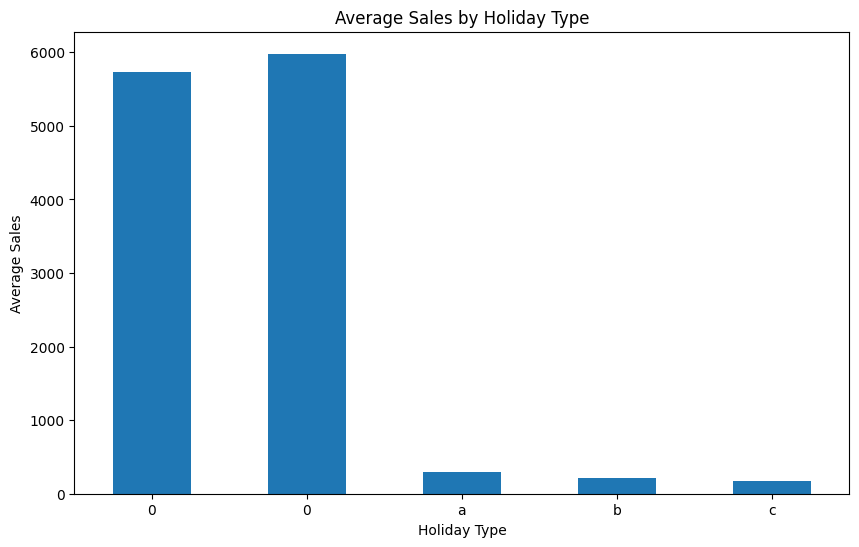

Non-Holiday Sales (0): 5980.279716566853
Easter Sales (b): 214.31150971599402
Christmas Sales (c): 168.7331707317073
Public Holiday Sales (a): 290.7356860809477
T-test Results:
Easter vs Non-Holiday: T-statistic = -255.24722881626462, P-value = 0.0
Christmas vs Non-Holiday: T-statistic = -245.58548131104578, P-value = 0.0
Public Holiday vs Non-Holiday: T-statistic = -413.309447673642, P-value = 0.0


In [79]:
# Step 1: Filter the data based on the StateHoliday column
holiday_sales = train_df.groupby('StateHoliday')['Sales'].mean()

# Step 2: Display average sales for each holiday type
print("Average Sales by Holiday Type:")
print(holiday_sales)

# Step 3: Compare sales during holidays (a, b, c) vs non-holidays (0)
holiday_sales_comparison = train_df.groupby('StateHoliday')['Sales'].mean()

# Step 4: Plot sales for each holiday type to see seasonal trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
holiday_sales_comparison.plot(kind='bar')
plt.title('Average Sales by Holiday Type')
plt.ylabel('Average Sales')
plt.xlabel('Holiday Type')
plt.xticks(rotation=0)
plt.show()

# Step 5: Calculate the difference in sales between holidays and non-holidays
non_holiday_sales = train_df[train_df['StateHoliday'] == '0']['Sales'].mean()

# Compare Easter, Christmas, and Public Holiday sales to non-holiday sales
easter_sales = train_df[train_df['StateHoliday'] == 'b']['Sales'].mean()
christmas_sales = train_df[train_df['StateHoliday'] == 'c']['Sales'].mean()
public_holiday_sales = train_df[train_df['StateHoliday'] == 'a']['Sales'].mean()

print(f"Non-Holiday Sales (0): {non_holiday_sales}")
print(f"Easter Sales (b): {easter_sales}")
print(f"Christmas Sales (c): {christmas_sales}")
print(f"Public Holiday Sales (a): {public_holiday_sales}")

# Step 6: Statistical test to check if there is a significant difference in sales
from scipy import stats

# Comparing sales during Easter, Christmas, and Public Holidays to non-holiday sales
easter_vs_non_holiday = stats.ttest_ind(train_df[train_df['StateHoliday'] == 'b']['Sales'],
                                        train_df[train_df['StateHoliday'] == '0']['Sales'], equal_var=False)
christmas_vs_non_holiday = stats.ttest_ind(train_df[train_df['StateHoliday'] == 'c']['Sales'],
                                           train_df[train_df['StateHoliday'] == '0']['Sales'], equal_var=False)
public_holiday_vs_non_holiday = stats.ttest_ind(train_df[train_df['StateHoliday'] == 'a']['Sales'],
                                                train_df[train_df['StateHoliday'] == '0']['Sales'], equal_var=False)

print("T-test Results:")
print(f"Easter vs Non-Holiday: T-statistic = {easter_vs_non_holiday.statistic}, P-value = {easter_vs_non_holiday.pvalue}")
print(f"Christmas vs Non-Holiday: T-statistic = {christmas_vs_non_holiday.statistic}, P-value = {christmas_vs_non_holiday.pvalue}")
print(f"Public Holiday vs Non-Holiday: T-statistic = {public_holiday_vs_non_holiday.statistic}, P-value = {public_holiday_vs_non_holiday.pvalue}")


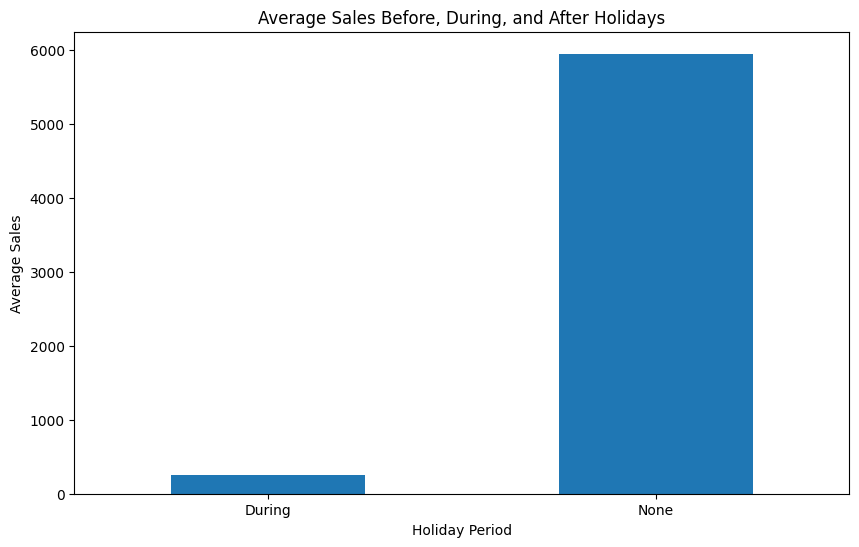

ANOVA Test Results:
F-statistic: nan
P-value: nan


C:\Users\neba\AppData\Local\Temp\ipykernel_6048\576630497.py:49: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(before_sales, during_sales, after_sales)


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Convert Date column to datetime if not already
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Step 2: Define the holiday periods (before, during, after)
# For simplicity, let's assume the holiday periods are 7 days before and after the holiday
holiday_periods = []

for index, row in train_df.iterrows():
    if row['StateHoliday'] in ['a', 'b', 'c']:  # If it's a holiday
        # Find the date before and after the holiday
        holiday_date = row['Date']
        before_date = holiday_date - pd.Timedelta(days=7)
        after_date = holiday_date + pd.Timedelta(days=7)

        # Check if the current row's date is before, during, or after the holiday
        if row['Date'] < before_date:
            holiday_periods.append('Before')
        elif row['Date'] > after_date:
            holiday_periods.append('After')
        else:
            holiday_periods.append('During')
    else:
        holiday_periods.append('None')  # For non-holidays

train_df['HolidayPeriod'] = holiday_periods

# Step 3: Calculate average sales for each period (Before, During, After)
sales_by_period = train_df.groupby('HolidayPeriod')['Sales'].mean()

# Step 4: Plot sales for each period to observe trends
plt.figure(figsize=(10, 6))
sales_by_period.plot(kind='bar')
plt.title('Average Sales Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.xlabel('Holiday Period')
plt.xticks(rotation=0)
plt.show()

# Step 5: Statistical Test to compare sales across periods (ANOVA or t-test)
# Perform ANOVA to test if there is a significant difference in sales across periods
before_sales = train_df[train_df['HolidayPeriod'] == 'Before']['Sales']
during_sales = train_df[train_df['HolidayPeriod'] == 'During']['Sales']
after_sales = train_df[train_df['HolidayPeriod'] == 'After']['Sales']

anova_result = stats.f_oneway(before_sales, during_sales, after_sales)
print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Step 6: If ANOVA shows significance, perform pairwise t-tests for specific comparisons
if anova_result.pvalue < 0.05:
    print("Significant difference found. Performing pairwise t-tests...")
    before_vs_during = stats.ttest_ind(before_sales, during_sales, equal_var=False)
    during_vs_after = stats.ttest_ind(during_sales, after_sales, equal_var=False)
    before_vs_after = stats.ttest_ind(before_sales, after_sales, equal_var=False)
    
    print(f"Before vs During: T-statistic = {before_vs_during.statistic}, P-value = {before_vs_during.pvalue}")
    print(f"During vs After: T-statistic = {during_vs_after.statistic}, P-value = {during_vs_after.pvalue}")
    print(f"Before vs After: T-statistic = {before_vs_after.statistic}, P-value = {before_vs_after.pvalue}")


Observations:

During Holidays: The average sales during holidays are significantly lower compared to the other periods. This suggests that sales dip during holiday seasons.

After Holidays: Sales after holidays appear to be the highest among the three periods. This indicates a potential surge in sales immediately following the holiday season.

Before Holidays: The average sales before holidays are higher than during holidays but lower than after holidays. This suggests a moderate level of sales activity in the period leading up to the holidays.

Possible Explanations:

Holiday Seasonality: The dip in sales during holidays could be attributed to various factors such as:

People spending less on non-essential items due to increased holiday expenses.
Stores being closed or having reduced hours during holidays.
People traveling or spending time with family, leading to decreased foot traffic in stores.
Post-Holiday Shopping: The surge in sales after holidays could be due to:

People using gift cards or spending money received as gifts.
Stores offering post-holiday sales and discounts to attract customers.
A general increase in consumer spending after the holiday season.
Recommendations:

Adjust Inventory: Stores could adjust their inventory levels to account for the expected dip in sales during holidays and the potential surge afterward.
Promotional Strategies: Implementing targeted promotions and discounts during and after holidays could help boost sales

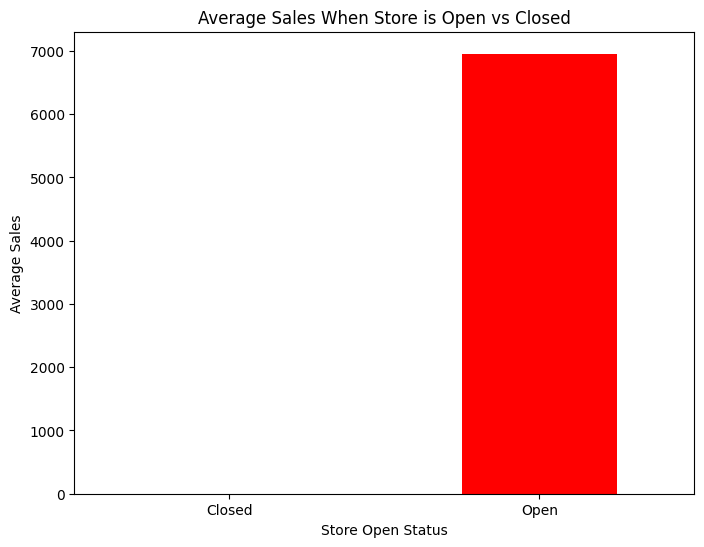

T-statistic: 2058.9677954561676
P-value: 0.0
There is a significant difference in sales between when the store is open and when it is closed.


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Group data by Open (1 = open, 0 = closed)
train_df['Open'] = train_df['Open'].astype(int)  # Ensure Open is an integer (0 or 1)

# Step 2: Calculate average sales for when the store is open vs closed
sales_by_open_status = train_df.groupby('Open')['Sales'].mean()

# Step 3: Visualize the sales trends
plt.figure(figsize=(8, 6))
sales_by_open_status.plot(kind='bar', color=['green', 'red'])
plt.title('Average Sales When Store is Open vs Closed')
plt.ylabel('Average Sales')
plt.xlabel('Store Open Status')
plt.xticks(ticks=[0, 1], labels=['Closed', 'Open'], rotation=0)
plt.show()

# Step 4: Perform a t-test to check if there is a significant difference in sales between open and closed times
open_sales = train_df[train_df['Open'] == 1]['Sales']
closed_sales = train_df[train_df['Open'] == 0]['Sales']

t_stat, p_value = stats.ttest_ind(open_sales, closed_sales, equal_var=False)

# Step 5: Display t-test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("There is a significant difference in sales between when the store is open and when it is closed.")
else:
    print("There is no significant difference in sales between when the store is open and when it is closed.")


The results of the t-test indicate that there is indeed a significant difference in sales between when the store is open and when it is closed. Specifically:

T-statistic: 2058.97
P-value: 0.0
Since the p-value is less than 0.05, you can reject the null hypothesis, which means that there is a statistically significant difference in sales between the two conditions (open vs. closed).

**Interpretation:**
Sales During Open Hours: The store generates sales when it is open.
Sales During Closed Hours: No sales occur when the store is closed, which is expected.
This finding reinforces the idea that store opening times directly impact sales, and the absence of sales during closed periods is a clear indicator of the importance of store operations.